# Explore here

In [52]:
import pandas as pd
import csv
import requests
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from imblearn.metrics import specificity_score

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
response = requests.get(url).content.decode('utf-8')

file_name = '../data/raw/bank-marketing-campaign-data.csv'

with open(file_name, 'w') as temp_file:
    temp_file.writelines(response)

In [3]:
df = pd.read_csv(file_name, sep=';')
pd.set_option('display.max_columns', None)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.10           93.99         -36.40       4.86      5191.00  no  
1          1.10           93.99         -36.40       4.86      5191.00  no  
2          1.10           93.99         -36.40       4.86      5191.00  no  
3          1.10           93.99         -36.40       4.86      5191.00  no  
4          1.10           93.99         -36.40       4.86      5191.00  no

In [4]:
#Obtenemos los valores únicos para averiguar si hay algun valor a descartar, no hay.

n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
#Buscamos registros duplicados, hay 12.
print(df.duplicated().sum())

12


In [6]:
df[df.duplicated() == True]

age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
1266   telephone   may         thu       124         1    999         0   
12261  telephone   jul         thu        88         1    999         0   
14234   cellular   jul         mon       331         2    999         0   
16956   cellular   jul         thu        43         3    999         0   
18465   cellular   jul         thu       128         1    999         0   
20216   cellular   aug         mon        33         1    999         0   
20534   cellular   aug         tue       127         1    999         0   
25217   cellular   nov         tue       123         2    999         0   
28477   cellular   apr         tue       114         1    999         0   
32516   cellular   may         fri       348         4    999         0   
36951   cellular   jul         thu       252         1    999         0   
38281  telephone   oct         tue       120         1    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1266   nonexistent          1.10           93.99         -36.40       4.86   
12261  nonexistent          1.40           93.92         -42.70       4.97   
14234  nonexistent          1.40           93.92         -42.70       4.96   
16956  nonexistent          1.40           93.92         -42.70       4.96   
18465  nonexistent          1.40           93.92         -42.70       4.97   
20216  nonexistent          1.40           93.44         -36.10       4.96   
20534  nonexistent          1.40           93.44         -36.10       4.97   
25217  nonexistent         -0.10           93.20         -42.00       4.15   
28477  nonexistent         -1.80           93.08         -47.10       1.42   
32516  nonexistent         -1.80           92.89         -46.20       1.31   
36951  nonexistent         -2.90           92.47         -33.60       1.07   
38281  nonexistent         -3.40           92.43         -26.90       0.74   

       nr.employed    y  
1266       5191.00   no  
12261      5228.10   no  
14234      5228.10   no  
16956      5228.10   no  
18465      5228.10   no  
20216      5228.10   no  
20534      5228.10   no  
25217      5195.80   no  
28477      5099.10   no  
32516      5099.10   no  
36951      5076.20  yes  
38281      5017.50   no

In [7]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [8]:
print(df.isnull().mean()*100)

#No hay valores nulos

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64


In [9]:
df.head(20)

age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
9    25     services    single          high.school       no     yes   no   
10   41  blue-collar   married              unknown  unknown      no   no   
11   25     services    single          high.school       no     yes   no   
12   29  blue-collar    single          high.school       no      no  yes   
13   57    housemaid  divorced             basic.4y       no     yes   no   
14   35  blue-collar   married             basic.6y       no     yes   no   
15   54      retired   married             basic.9y  unknown     yes  yes   
16   35  blue-collar   married             basic.6y       no     yes   no   
17   46  blue-collar   married             basic.6y  unknown     yes  yes   
18   50  blue-collar   married             basic.9y       no     yes  yes   
19   39   management    single             basic.9y  unknown      no   no   

      contact month day_of_week  duration  campaign  pdays  previous  \
0   telephone   may         mon       261         1    999         0   
1   telephone   may         mon       149         1    999         0   
2   telephone   may         mon       226         1    999         0   
3   telephone   may         mon       151         1    999         0   
4   telephone   may         mon       307         1    999         0   
5   telephone   may         mon       198         1    999         0   
6   telephone   may         mon       139         1    999         0   
7   telephone   may         mon       217         1    999         0   
8   telephone   may         mon       380         1    999         0   
9   telephone   may         mon        50         1    999         0   
10  telephone   may         mon        55         1    999         0   
11  telephone   may         mon       222         1    999         0   
12  telephone   may         mon       137         1    999         0   
13  telephone   may         mon       293         1    999         0   
14  telephone   may         mon       146         1    999         0   
15  telephone   may         mon       174         1    999         0   
16  telephone   may         mon       312         1    999         0   
17  telephone   may         mon       440         1    999         0   
18  telephone   may         mon       353         1    999         0   
19  telephone   may         mon       195         1    999         0   

       poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0   nonexistent          1.10           93.99         -36.40       4.86   
1   nonexistent          1.10           93.99         -36.40       4.86   
2   nonexistent          1.10           93.99         -36.40       4.86   
3   nonexistent          1.10           93.99         -36.40       4.86   
4   nonexistent          1.10           93.99         -36.40       4.86   
5   nonexistent          1.10           93.99         -36.40       4.86   
6   nonexistent          1.10           93.99         -36.40       4.86   
7   nonexistent          1.10           93.99         -36.40       4.86   
8   nonexistent          1.10           93.99         -36.40       4.86   
9   nonexistent          1.10           93.99         -36.40       4.86   
10  nonexistent          1.10           93.99   

In [10]:
print(df["contact"].unique())

#La forma de contacto no es relevante para el estudio

df.drop(['contact'], axis=1, inplace=True)


['telephone' 'cellular']


In [11]:
#Teniendo el parámetro pdays el día y el mes de contacto me parecen irrelevantes para el estudio, los elimino

df.drop(['month'], axis=1, inplace=True)
df.drop(['day_of_week'], axis=1, inplace=True)

<Axes: >

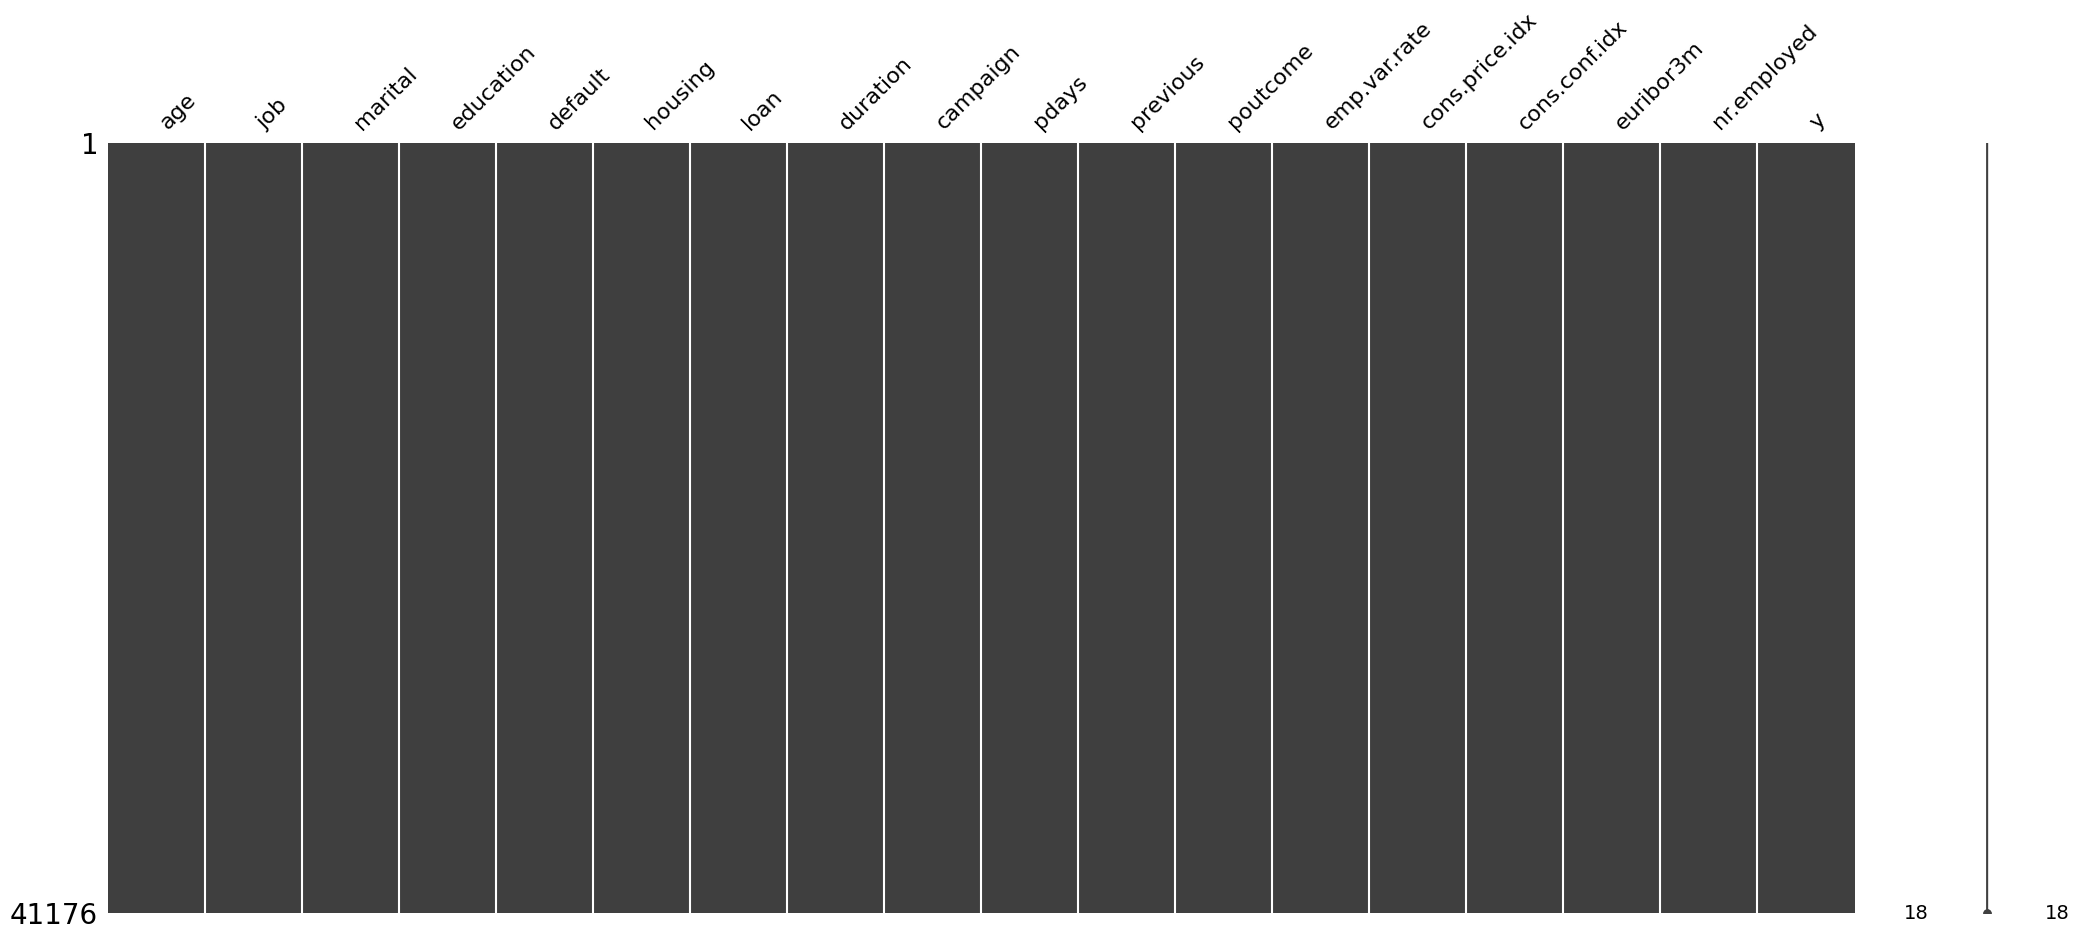

In [12]:
msno.matrix(df)

In [13]:
df.describe()

age  duration  campaign    pdays  previous  emp.var.rate  \
count 41176.00  41176.00  41176.00 41176.00  41176.00      41176.00   
mean     40.02    258.32      2.57   962.46      0.17          0.08   
std      10.42    259.31      2.77   186.94      0.49          1.57   
min      17.00      0.00      1.00     0.00      0.00         -3.40   
25%      32.00    102.00      1.00   999.00      0.00         -1.80   
50%      38.00    180.00      2.00   999.00      0.00          1.10   
75%      47.00    319.00      3.00   999.00      0.00          1.40   
max      98.00   4918.00     56.00   999.00      7.00          1.40   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count        41176.00       41176.00   41176.00     41176.00  
mean            93.58         -40.50       3.62      5167.03  
std              0.58           4.63       1.73        72.25  
min             92.20         -50.80       0.63      4963.60  
25%             93.08         -42.70       1.34      5099.10  
50%             93.75         -41.80       4.86      5191.00  
75%             93.99         -36.40       4.96      5228.10  
max             94.77         -26.90       5.04      5228.10

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

In [15]:
print(df.duplicated().sum())

# Hay un registro duplicado

1


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
print(df["job"].unique())

df["job_f"] = pd.factorize(df["job"])[0]


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [18]:
print(df["marital"].unique())

df["marital_f"] = pd.factorize(df["marital"])[0]

['married' 'single' 'divorced' 'unknown']


In [19]:
print(df["education"].unique())

df.loc[df["education"] == "unknown" , 'education_f'] = 0
df.loc[df["education"] == "illiterate" , 'education_f'] = 1
df.loc[df["education"] == "basic.4y" , 'education_f'] = 2
df.loc[df["education"] == "basic.6y" , 'education_f'] = 3
df.loc[df["education"] == "basic.9y" , 'education_f'] = 4
df.loc[df["education"] == "high.school" , 'education_f'] = 5
df.loc[df["education"] == "professional.course" , 'education_f'] = 6
df.loc[df["education"] == "university.degree" , 'education_f'] = 7



['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [20]:
print(df["default"].unique())

df.loc[df["default"] == "unknown" , 'default_f'] = 0
df.loc[df["default"] == "no" , 'default_f'] = 1
df.loc[df["default"] == "yes" , 'default_f'] = 2

['no' 'unknown' 'yes']


In [21]:
print(df["housing"].unique())

df.loc[df["housing"] == "unknown" , 'housing_f'] = 0
df.loc[df["housing"] == "no" , 'housing_f'] = 1
df.loc[df["housing"] == "yes" , 'housing_f'] = 2

['no' 'yes' 'unknown']


In [22]:
print(df["loan"].unique())

df.loc[df["loan"] == "unknown" , 'loan_f'] = 0
df.loc[df["loan"] == "no" , 'loan_f'] = 1
df.loc[df["loan"] == "yes" , 'loan_f'] = 2

['no' 'yes' 'unknown']


In [23]:
print(df["poutcome"].unique())

df.loc[df["poutcome"] == "nonexistent" , 'poutcome_f'] = 0
df.loc[df["poutcome"] == "failure" , 'poutcome_f'] = 1
df.loc[df["poutcome"] == "success" , 'poutcome_f'] = 2


['nonexistent' 'failure' 'success']


In [24]:
print(df["y"].unique())

df.loc[df["y"] == "no" , 'y'] = 0
df.loc[df["y"] == "yes" , 'y'] = 1

['no' 'yes']


In [25]:
df.head()

age        job  marital    education  default housing loan  duration  \
0   56  housemaid  married     basic.4y       no      no   no       261   
1   57   services  married  high.school  unknown      no   no       149   
2   37   services  married  high.school       no     yes   no       226   
3   40     admin.  married     basic.6y       no      no   no       151   
4   56   services  married  high.school       no      no  yes       307   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0  nonexistent          1.10           93.99   
1         1    999         0  nonexistent          1.10           93.99   
2         1    999         0  nonexistent          1.10           93.99   
3         1    999         0  nonexistent          1.10           93.99   
4         1    999         0  nonexistent          1.10           93.99   

   cons.conf.idx  euribor3m  nr.employed  y  job_f  marital_f  education_f  \
0         -36.40       4.86      5191.00  0      0          0         2.00   
1         -36.40       4.86      5191.00  0      1          0         5.00   
2         -36.40       4.86      5191.00  0      1          0         5.00   
3         -36.40       4.86      5191.00  0      2          0         3.00   
4         -36.40       4.86      5191.00  0      1          0         5.00   

   default_f  housing_f  loan_f  poutcome_f  
0       1.00       1.00    1.00        0.00  
1       0.00       1.00    1.00        0.00  
2       1.00       2.00    1.00        0.00  
3       1.00       1.00    1.00        0.00  
4       1.00       1.00    2.00        0.00

In [26]:
df.info(max_cols=len(df.columns))

<class 'pandas.core.frame.DataFrame'>
Index: 41175 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   default         41175 non-null  object 
 5   housing         41175 non-null  object 
 6   loan            41175 non-null  object 
 7   duration        41175 non-null  int64  
 8   campaign        41175 non-null  int64  
 9   pdays           41175 non-null  int64  
 10  previous        41175 non-null  int64  
 11  poutcome        41175 non-null  object 
 12  emp.var.rate    41175 non-null  float64
 13  cons.price.idx  41175 non-null  float64
 14  cons.conf.idx   41175 non-null  float64
 15  euribor3m       41175 non-null  float64
 16  nr.employed     41175 non-null  float64
 17  y               41175 non-null  obje

In [27]:
#Separamos la variable dependiente de las independientes (y las variables no factorizadas) con el nuevo dataframe 
X = df[["age", "job_f", "marital_f", "education_f", "default_f",	
                        "housing_f", "loan_f", "duration", "campaign", "pdays", "previous", "poutcome_f", "emp.var.rate",	
                        "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBClassifier(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

           Feature  Importance
16     nr.employed       68.04
11      poutcome_f        6.74
7         duration        4.41
14   cons.conf.idx        2.88
9            pdays        2.63
13  cons.price.idx        2.15
15       euribor3m        1.85
4        default_f        1.82
10        previous        1.20
8         campaign        1.16
3      education_f        1.15
12    emp.var.rate        1.12
6           loan_f        1.07
1            job_f        1.05
0              age        1.02
2        marital_f        0.95
5        housing_f        0.78


Elimino las columnas marital_f, previous, loan_f y housing_f al ser menores del 1% en importancia 

In [29]:
df1 = df[["age", "job_f", "education_f", "default_f",	
                        "duration", "campaign", "pdays", "poutcome_f", "emp.var.rate",	
                        "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]]

In [30]:
X = df1.drop(['y'], axis=1)
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif


age                  1.40
job_f                1.34
education_f          1.58
default_f            1.96
duration             1.06
campaign             1.96
pdays               17.71
poutcome_f          24.91
emp.var.rate      6546.91
cons.price.idx     613.13
cons.conf.idx      160.09
euribor3m        22604.78
nr.employed       7957.84
dtype: float64

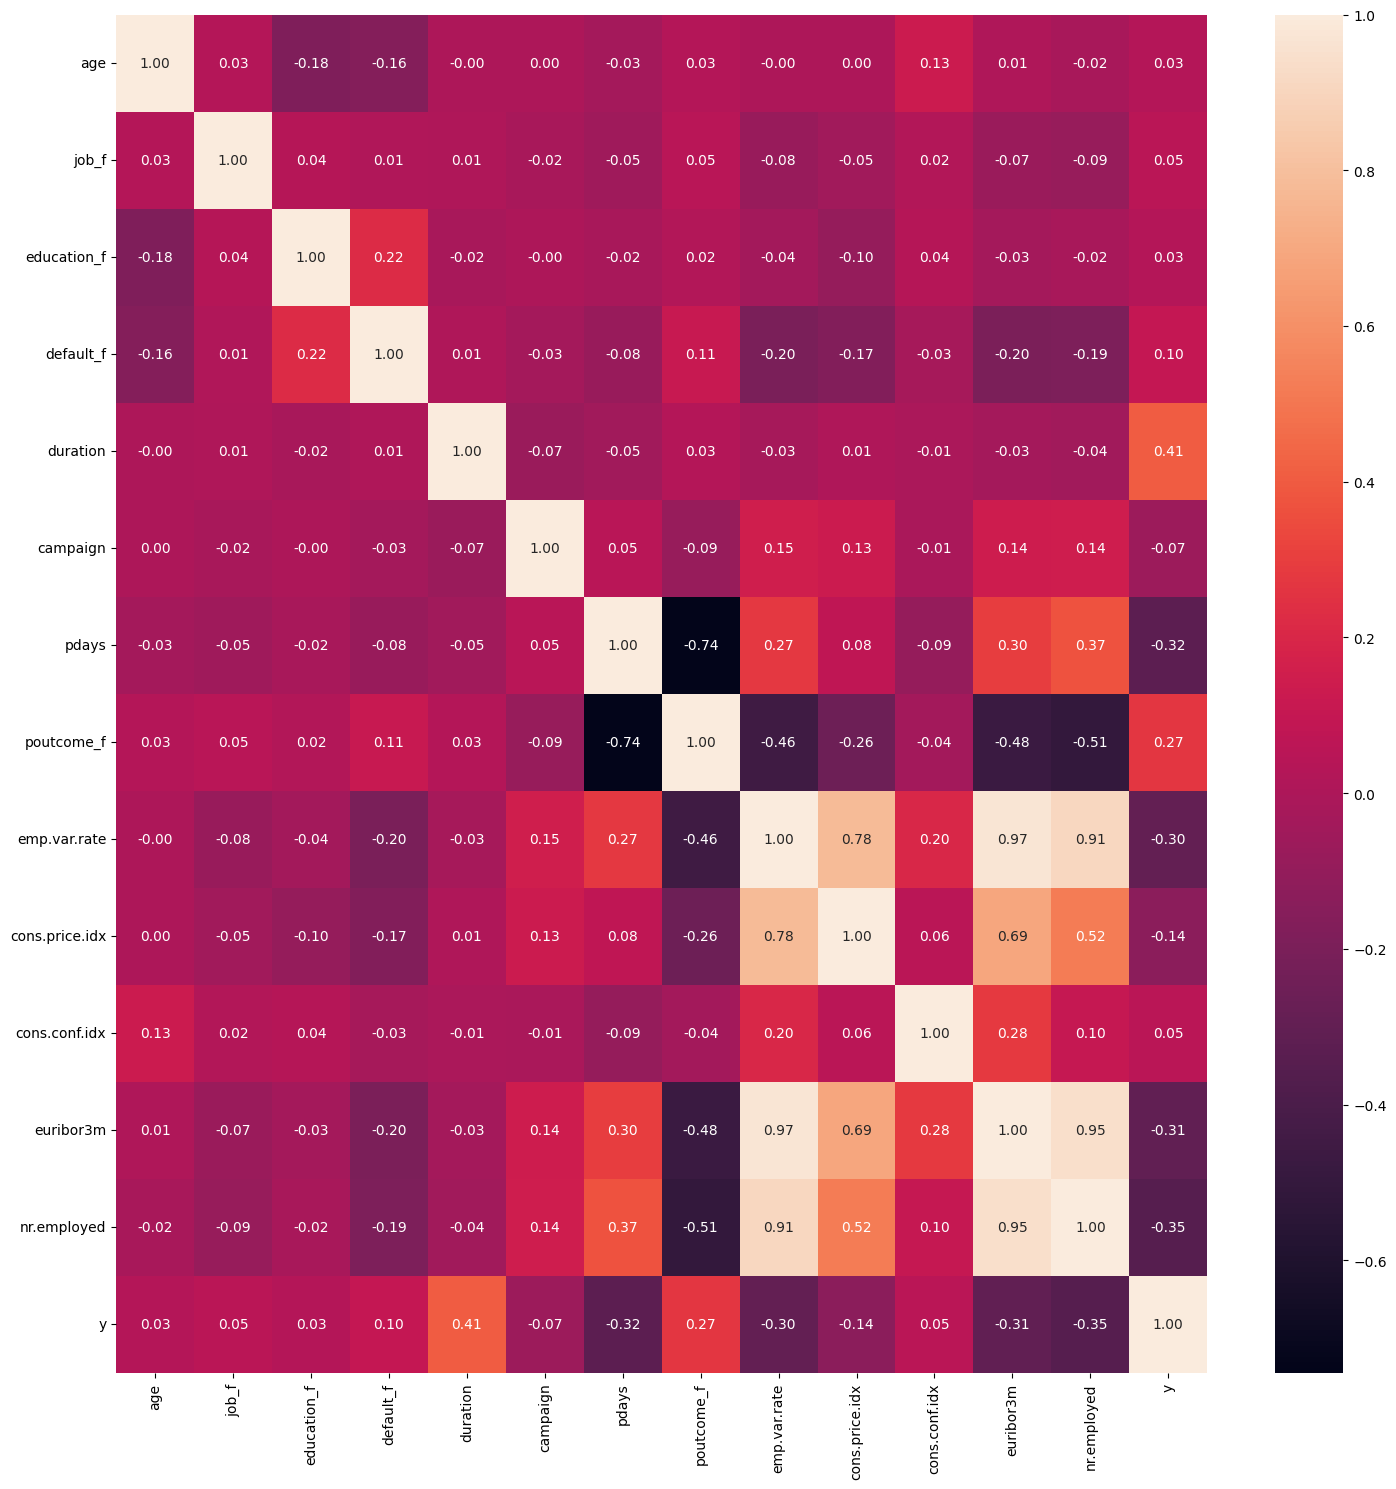

In [32]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df1.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Observamos que la variable con más importancia es el euribor.
Las variables nr.employed y emp.var.rate están relaccionadas entre sí, ambas relativas a empleados, y están fuertemente correlacionadas en el heatmap, por lo que me quedo con nr.employed, ya que tiene un vif más alto.

In [33]:
df1.drop(['emp.var.rate'], axis=1, inplace=True)



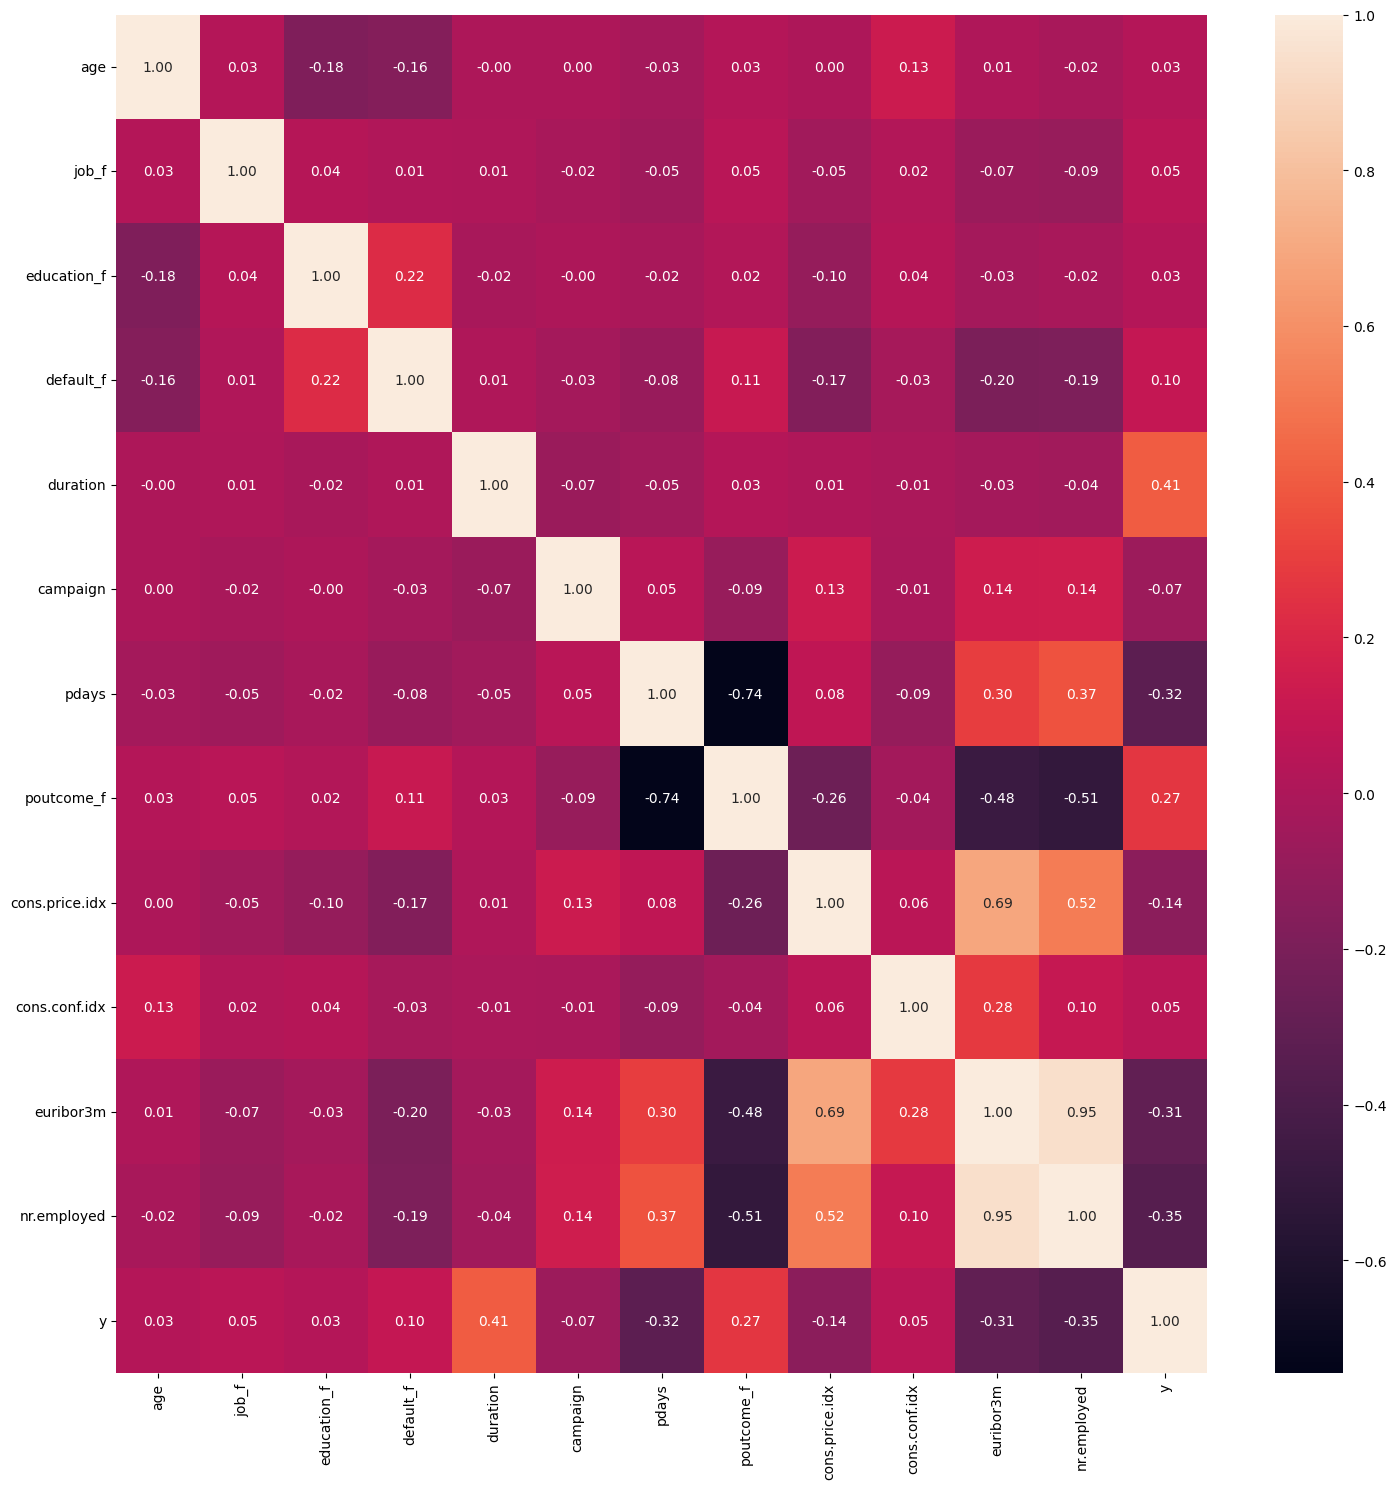

In [34]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df1.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Sigue habiendo variables con mucha correlación entre sí, pero referentes a diferentes características (euribor y número de empleados, por ejemplo, tiene sentido que tengan relacción, pero una es una variable económica que afecta a otras variables, y los empleados son datos relativos a personal), así que de momento decido dejar el dataframe con estas características.

In [35]:
X = df1.drop(['y'], axis=1)
y = df1['y'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Identificar las variables binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [37]:
scaler = MinMaxScaler().fit(X_train)

In [38]:
# Trasnformamos los datos numericos con el escalador ajustado
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [39]:
# Selección del algoritmo de clasificacion
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
scores, predictions = reg.fit(X_train_sc, X_test_sc, y_train, y_test)

 12%|█▎        | 4/32 [00:02<00:15,  1.77it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X).


 28%|██▊       | 9/32 [00:05<00:13,  1.77it/s]

FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 38%|███▊      | 12/32 [00:07<00:12,  1.61it/s]

LabelPropagation model failed to execute
Unable to allocate 8.08 GiB for an array with shape (32940, 32940) and data type float64
LabelSpreading model failed to execute
Unable to allocate 8.08 GiB for an array with shape (32940, 32940) and data type float64


 62%|██████▎   | 20/32 [00:08<00:03,  3.87it/s]

NuSVC model failed to execute
specified nu is infeasible


 84%|████████▍ | 27/32 [00:25<00:15,  3.15s/it]

SelfTrainingClassifier model failed to execute
You must pass an estimator to SelfTrainingClassifier. Use `estimator`.
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


 97%|█████████▋| 31/32 [00:25<00:01,  1.49s/it]

XGBClassifier model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Number of positive: 3657, number of negative: 29283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111020 -> initscore=-2.080364
[LightGBM] [Info] Start training from score -2.080364


100%|██████████| 32/32 [00:26<00:00,  1.22it/s]


In [40]:
scores

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.82               0.78     0.78      0.84   
QuadraticDiscriminantAnalysis      0.88               0.76     0.76      0.89   
LGBMClassifier                     0.91               0.75     0.75      0.91   
GaussianNB                         0.88               0.74     0.74      0.88   
PassiveAggressiveClassifier        0.87               0.74     0.74      0.88   
RandomForestClassifier             0.91               0.74     0.74      0.90   
DecisionTreeClassifier             0.88               0.73     0.73      0.89   
BernoulliNB                        0.86               0.73     0.73      0.87   
BaggingClassifier                  0.90               0.72     0.72      0.89   
ExtraTreesClassifier               0.90               0.71     0.71      0.90   
LinearDiscriminantAnalysis         0.90               0.71     0.71      0.90   
ExtraTreeClassifier                0.88               0.71     0.71      0.88   
KNeighborsClassifier               0.90               0.71     0.71      0.89   
SVC                                0.91               0.69     0.69      0.90   
LogisticRegression                 0.90               0.69     0.69      0.89   
CalibratedClassifierCV             0.90               0.68     0.68      0.89   
SGDClassifier                      0.90               0.67     0.67      0.89   
AdaBoostClassifier                 0.90               0.67     0.67      0.89   
LinearSVC                          0.90               0.66     0.66      0.89   
RidgeClassifier                    0.90               0.64     0.64      0.88   
RidgeClassifierCV                  0.90               0.64     0.64      0.88   
Perceptron                         0.89               0.60     0.60      0.87   
DummyClassifier                    0.88               0.50     0.50      0.82   

                               Time Taken  
Model                                      
NearestCentroid                      0.06  
QuadraticDiscriminantAnalysis        0.07  
LGBMClassifier                       0.42  
GaussianNB                           0.04  
PassiveAggressiveClassifier          0.09  
RandomForestClassifier               3.28  
DecisionTreeClassifier               0.21  
BernoulliNB                          0.05  
BaggingClassifier                    1.05  
ExtraTreesClassifier                 2.25  
LinearDiscriminantAnalysis           0.65  
ExtraTreeClassifier                  0.04  
KNeighborsClassifier                 2.05  
SVC                                 13.32  
LogisticRegression                   0.04  
CalibratedClassifierCV               0.53  
SGDClassifier                        0.11  
AdaBoostClassifier                   1.00  
LinearSVC                            0.08  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.12  
Perceptron                           0.08  
DummyClassifier                      0.03

In [41]:
# El mejor modelo en base a las métricas parece ser LGBMClassifier

# Instanciamos el estimador
estimator = lgb.LGBMClassifier()

# Definimos el espacio de búsqueda de los hp
param_dist = {'n_estimators':[10, 50, 100, 250], 'max_depth':np.arange(10, 100, 10)}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator, param_dist, n_iter=5, random_state=42, n_jobs=-1, scoring='accuracy', verbose=2, cv=5)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [bin

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=90, n_estimators=250; total time=   1.1s
[CV] END .....................max_depth=90, n_estimators=250; total time=   1.1s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210
[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

[CV] END .....................max_depth=90, n_estimators=250; total time=   0.9s
[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110997 -> initscore=-2.080595
[LightGBM] [Info] Start training from score -2.080595
[CV] END .....................max_depth=90, n_estimators=250; total time=   0.9s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.2s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.2s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.4s
[CV] END .....................max_depth=90, n_estimators=250; total time=   1.0s
[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110997 -> initscore=-2.080595
[LightGBM] [Info] Start training from score -2.080595
[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.3s
[CV] END ......................max_depth=40, n_estimators=50; total time=   0.3s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info]

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=70, n_estimators=100; total time=   0.6s[CV] END .....................max_depth=70, n_estimators=100; total time=   0.5s

[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110997 -> initscore=-2.080595
[LightGBM] [Info] Start training from score -2.080595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=70, n_estimators=100; total time=   0.5s
[CV] END .....................max_depth=70, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110997 -> initscore=-2.080595
[LightGBM] [Info] Start training from score -2.080595
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210
[CV] END .....................max_depth=70, n_estimators=100; total time=   0.6s


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110997 -> initscore=-2.080595
[LightGBM] [Info] Start training from score -2.080595
[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2925, number of negative: 23427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110997 -> initscore=-2.080595
[LightGBM] [Info] Start training from score -2.080595


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210
[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=50, n_estimators=10; total time=   0.1s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

[LightGBM] [Info] Number of positive: 3657, number of negative: 29283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111020 -> initscore=-2.080364
[LightGBM] [Info] Start training from score -2.080364


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': [10, 50, 100, 250]},
                   random_state=42, scoring='accuracy', verbose=2)

In [42]:
random_search.best_score_

np.float64(0.9170006071645416)

In [43]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': np.int64(70)}

In [44]:
random_search.best_estimator_

LGBMClassifier(max_depth=np.int64(70))

In [45]:
param_dist = {'n_estimators':[40, 50, 60], 'max_depth':np.arange(30, 60, 10)}

# Realizamos la búsqueda por fuerza bruta
grid_search = GridSearchCV(estimator, param_dist, verbose=3)
grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111035 -> initscore=-2.080210
[LightGBM] [Info] Start training from score -2.080210
[CV 1/5] END .....max_depth=30, n_estimators=40;, score=0.917 total time=   0.3s
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightG

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': array([30, 40, 50]),
                         'n_estimators': [40, 50, 60]},
             verbose=3)

In [46]:
grid_search.best_estimator_

LGBMClassifier(max_depth=np.int64(30), n_estimators=40)

In [66]:
# Evalúo el modelo

y_pred_train = grid_search.best_estimator_.predict(X_train_sc)
y_pred_test = grid_search.best_estimator_.predict(X_test_sc)

In [53]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [67]:
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

Accuracy   F1  AUC  Precision  Recall  Specificity
Train           0.93 0.64 0.78       0.71    0.59         0.97
Test            0.91 0.59 0.75       0.66    0.53         0.96
Diferencia      0.02 0.05 0.03       0.04    0.05         0.01

Se puede observar que no hay overfitting y que las gráficas a nivel general, y sobre todo en cuanto a diferencia entre los resultados de train y test, son muy buenas.

En esta situación elegimos un algoritmo de stacking.

In [68]:
clf = []

#clf.append(('Nearest Centroid', NearestCentroid()))
#clf.append(('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()))
clf.append(('RandomForestClassifier', RandomForestClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)))
clf.append(('ExtraTreesClassifier', ExtraTreesClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)))
#clf.append(('LGBMClassifier', lgb.LGBMClassifier()))
clf.append(('LGBMClassifier', lgb.LGBMClassifier(max_depth=np.int64(20), n_estimators=30, random_state=42)))
#clf.append(('LGBMClassifier2', lgb.LGBMClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)))
#clf.append(('LGBMClassifier3', lgb.LGBMClassifier(max_depth=np.int64(40), n_estimators=50, random_state=42)))

#lr = lgb.LGBMClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)

lr = LogisticRegression(random_state=42)


In [69]:
stacking = StackingClassifier(estimators=clf,final_estimator=lr).fit(X_train_sc, y_train)
#stacking = StackingClassifier(estimators=clf).fit(X_train_sc, y_train)

[LightGBM] [Info] Number of positive: 3657, number of negative: 29283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111020 -> initscore=-2.080364
[LightGBM] [Info] Start training from score -2.080364
[LightGBM] [Info] Number of positive: 2926, number of negative: 23426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [bin

In [70]:
y_pred_train1 = stacking.predict(X_train_sc)
y_pred_test1 = stacking.predict(X_test_sc)

In [73]:
get_metrics(y_train, y_test, y_pred_train1, y_pred_test1)

Accuracy   F1  AUC  Precision  Recall  Specificity
Train           0.97 0.83 0.87       0.93    0.75         0.99
Test            0.91 0.59 0.74       0.67    0.53         0.96
Diferencia      0.05 0.24 0.13       0.27    0.22         0.03

Podemos observar que las métricas mejoras, aunque sobre todo para train, y muy ligeramente para test, sí se aprecia mejora, así que elegimos este estimador.

In [54]:
# Reentrenamiento y exportación del modelo

binary_cols

Index([], dtype='object')

In [75]:
# Aplicamos el proceso a todo el conjunto de datos

X_final = pd.concat([X_train, X_test], ignore_index=True)
y_final = pd.concat([y_train, y_test], axis=0)

In [76]:
# Instanciamos el escalador y lo ajustamos a los datos
scaler = MinMaxScaler().fit(X_final)

# Transformamos los datos
X_final_sc = scaler.transform(X_final)

In [77]:
X_final_sc = pd.DataFrame(X_final_sc, columns=X_final.columns)

In [78]:
X_final_sc.head()

age  job_f  education_f  default_f  duration  campaign  pdays  poutcome_f  \
0 0.16   0.09         0.71       0.50      0.32      0.04   1.00        0.00   
1 0.14   0.36         0.86       0.50      0.01      0.07   1.00        0.00   
2 0.17   0.27         0.43       0.00      0.00      0.00   1.00        0.00   
3 0.22   0.18         1.00       0.50      0.03      0.00   1.00        0.00   
4 0.23   0.36         0.86       0.50      0.05      0.00   1.00        0.00   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0            0.67           0.34       0.98         1.00  
1            0.67           0.34       0.98         1.00  
2            0.27           0.19       0.16         0.51  
3            0.70           0.60       0.96         0.86  
4            0.48           0.62       0.98         1.00

In [79]:
# Entrenamos el mdelo final con el restultado de StackingClassifier

modelo_final = StackingClassifier(estimators=clf,final_estimator=lr).fit(X_final_sc, y_final)
#modelo_final = lgb.LGBMClassifier(max_depth=np.int64(30), n_estimators=40).fit(X_final_sc, y_final)

[LightGBM] [Info] Number of positive: 4639, number of negative: 36536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 41175, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112665 -> initscore=-2.063799
[LightGBM] [Info] Start training from score -2.063799
[LightGBM] [Info] Number of positive: 3712, number of negative: 29228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [bin

In [80]:
# Función que prepara los datos para predecir
def custom_transform(X):
  # No hay columnas binarias, así que no realizo la separación
  X_first_step_sc = scaler.transform(X)
  # Unimos la versión numérica escalada con los datos binarios
  X_sc = pd.DataFrame(X_first_step_sc, columns=X.columns)
  return X_sc

In [82]:
# Definimos los pasos a seguir
steps = [('transformacion', FunctionTransformer(func=custom_transform)),
         ('prediccion', modelo_final)]

# Creamos el pipeline
pipeline = Pipeline(steps)

In [83]:
# Exportamos el pipeline
joblib.dump(pipeline, '../data/processed/pipeline_model.pkl')

['../data/processed/pipeline_model.pkl']

In [84]:
# Cargamos el pipeline
loaded_pipeline = joblib.load('../data/processed/pipeline_model.pkl')

In [85]:
X_train.head(1)

age  job_f  education_f  default_f  duration  campaign  pdays  \
12349   30      1         5.00       1.00      1576         3    999   

       poutcome_f  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
12349        0.00           93.92         -42.70       4.96      5228.10

In [86]:
new_entry = pd.DataFrame({"age":[20,50],
     "job_f":[3, 11],
     "education_f":[1.0, 7.0],
     "default_f":[1.0, 2.0],
     "duration":[103,1108],
     "campaign":[56,1],
     "pdays":[999,1],
     "poutcome_f":[1.0,2.0],
     "cons.price.idx":[93.918,92.756],
     "cons.conf.idx":[-36.1,-45.9],
     "euribor3m":[4.959,0.933],
     "nr.employed":[5228.1,5176.3]})



new_entry

age  job_f  education_f  default_f  duration  campaign  pdays  poutcome_f  \
0   20      3         1.00       1.00       103        56    999        1.00   
1   50     11         7.00       2.00      1108         1      1        2.00   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           93.92         -36.10       4.96      5228.10  
1           92.76         -45.90       0.93      5176.30

In [87]:
loaded_pipeline.predict(new_entry)

array([0, 1])

Para el primer caso tendríamos un resultado negativo, y para el segundo caso un resultado positivo.